<a href="https://colab.research.google.com/github/cjsutton77/seismic_fd/blob/main/Very_Simple_Seismic_FD_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

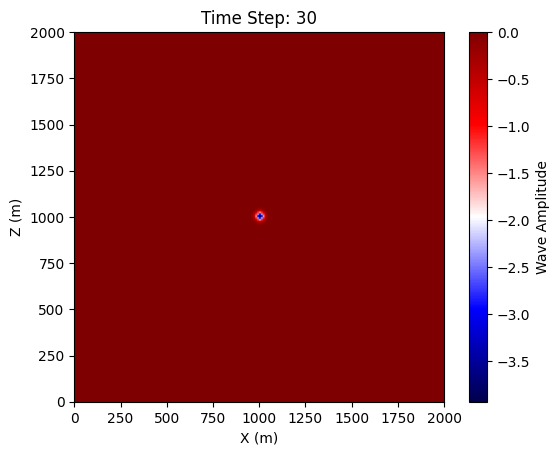

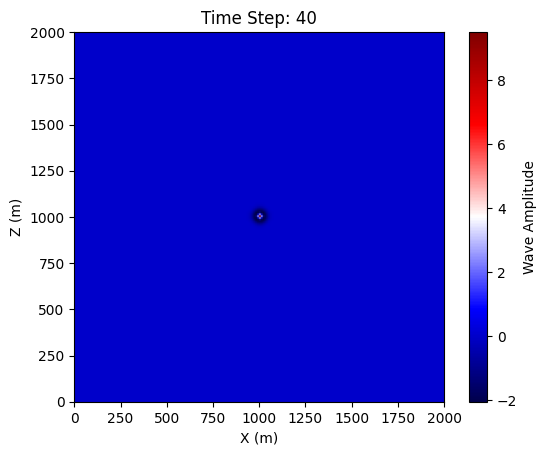

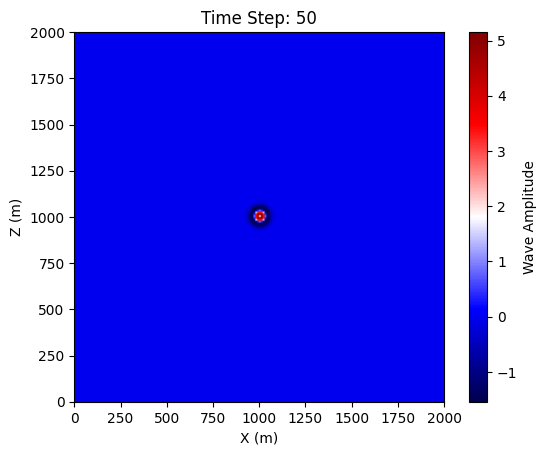

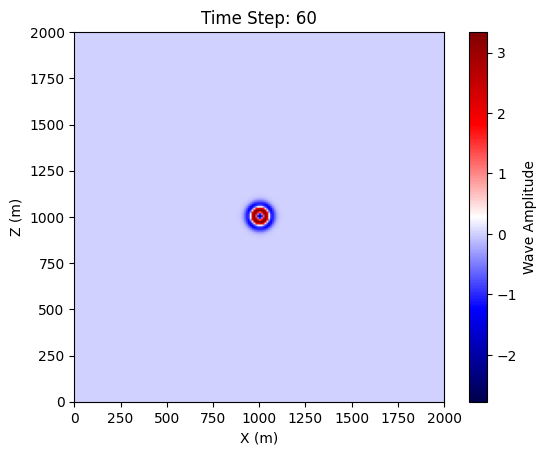

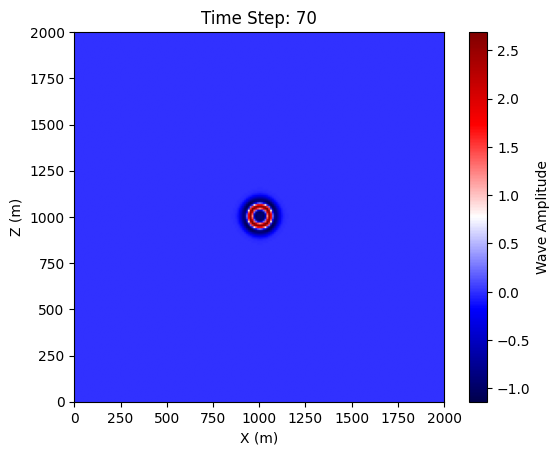

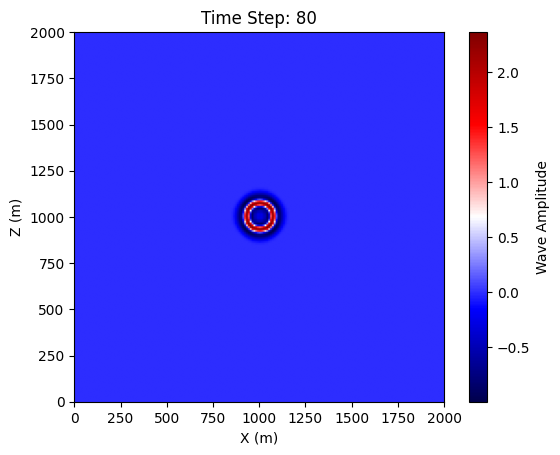

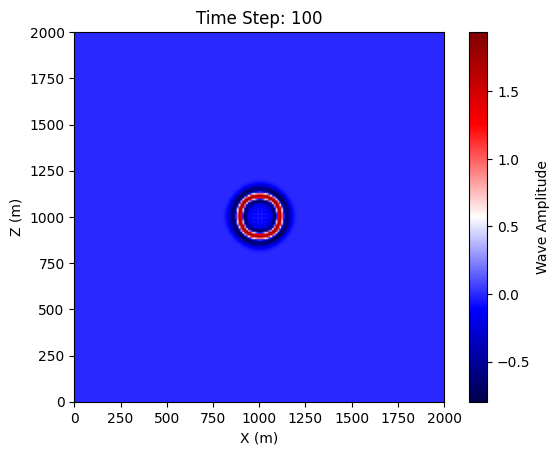

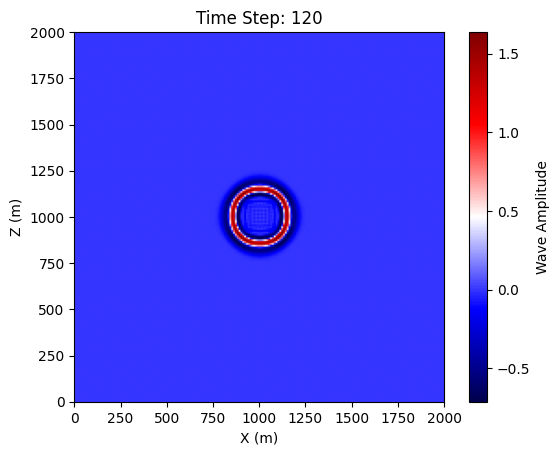

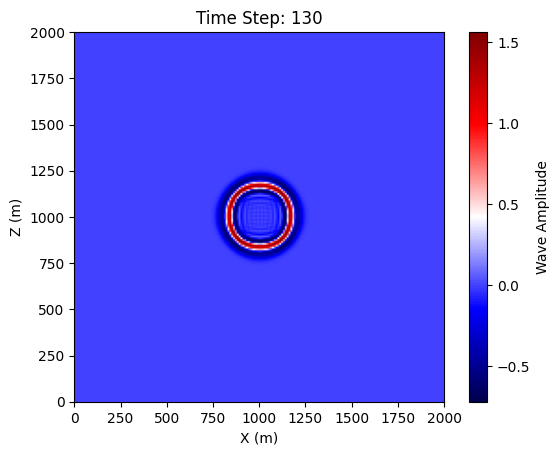

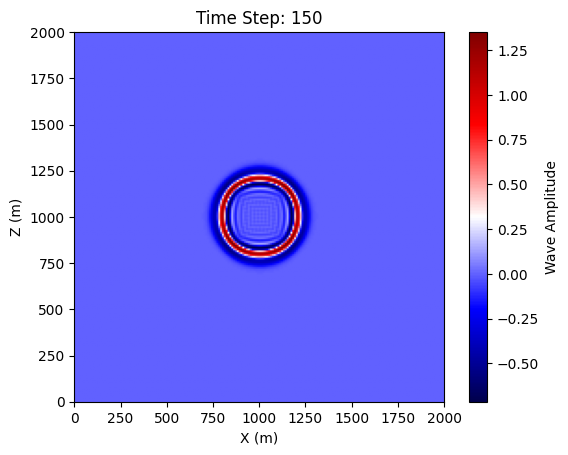

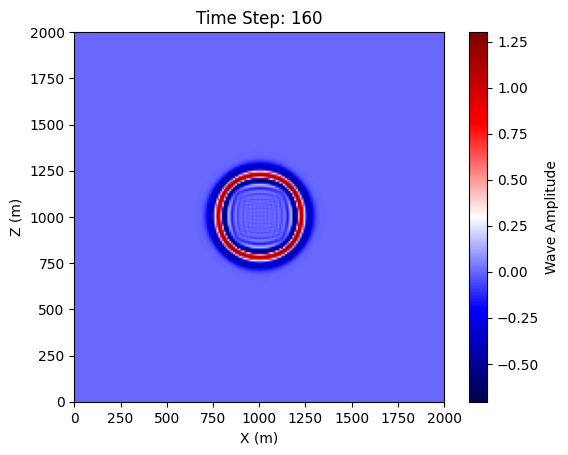

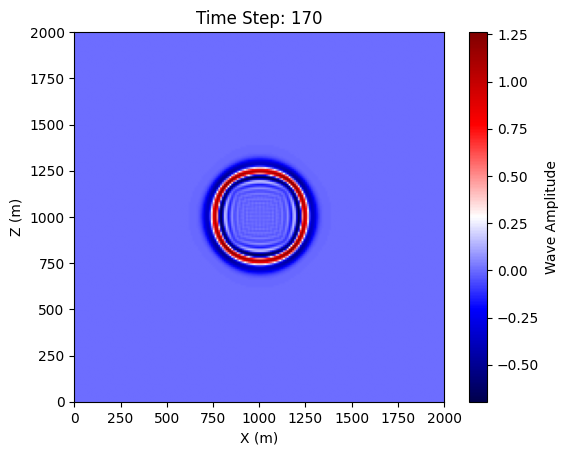

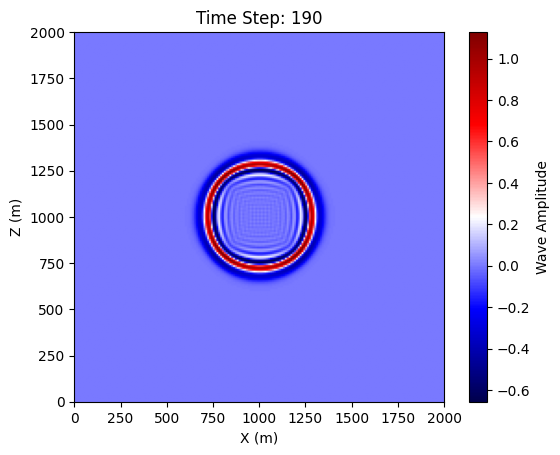

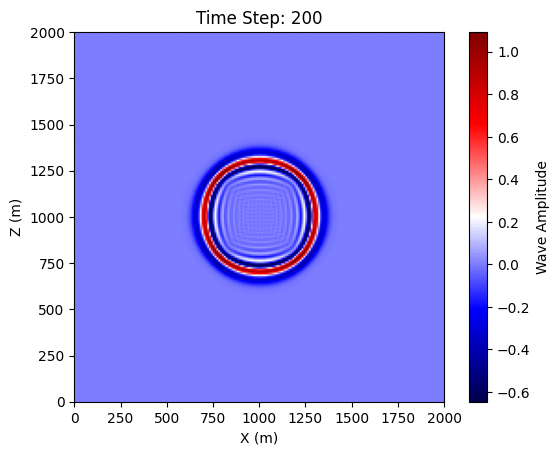

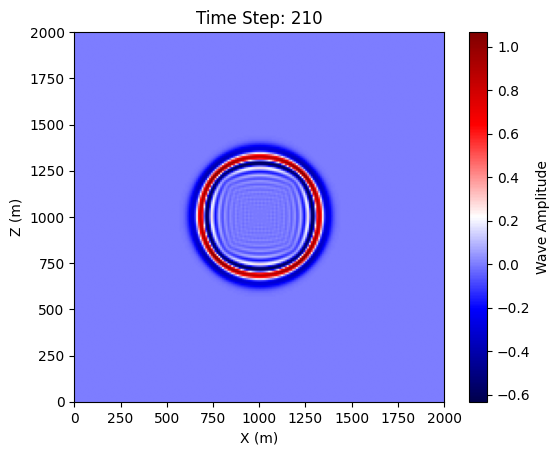

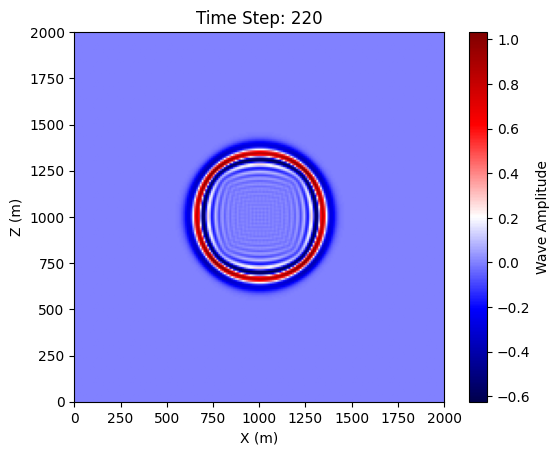

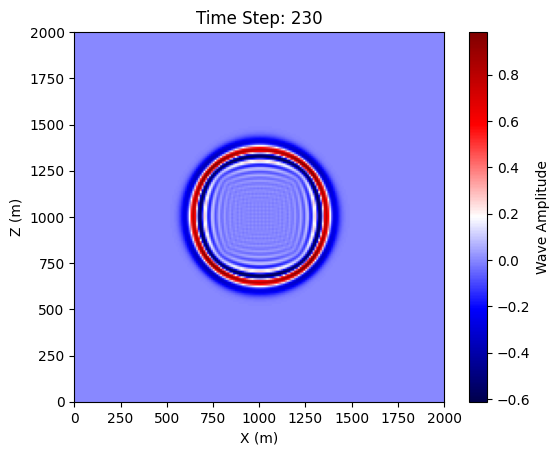

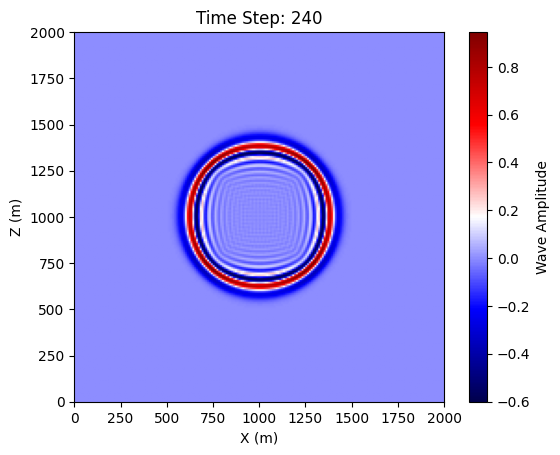

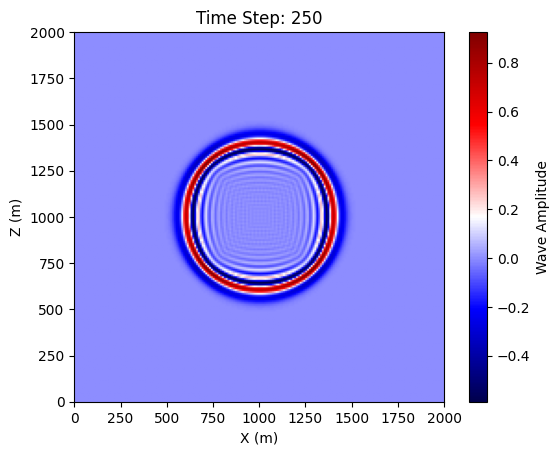

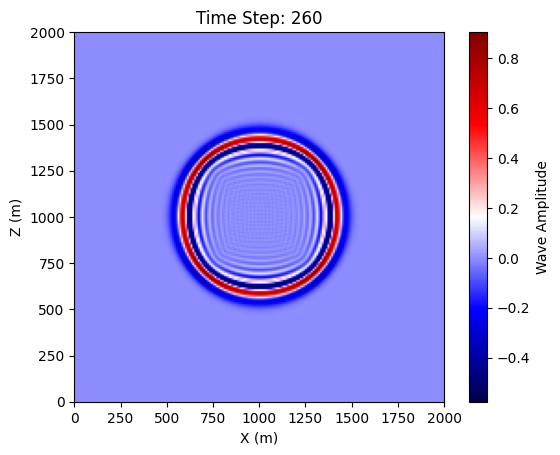

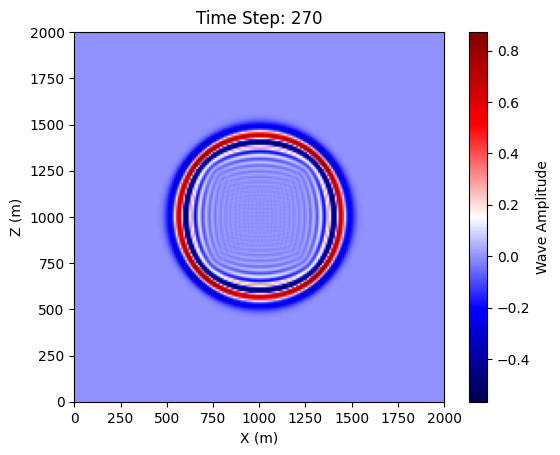

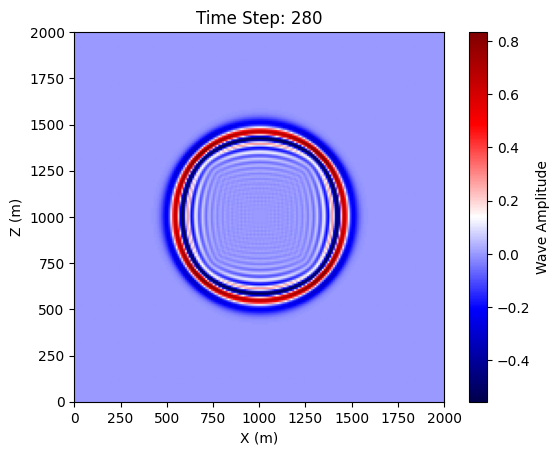

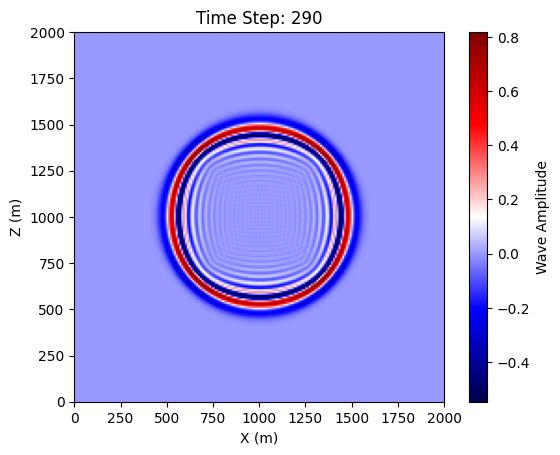

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid and time parameters
nx, nz = 200, 200  # Grid size
dx, dz = 10.0, 10.0  # Grid spacing (meters)
nt = 300  # Number of time steps
dt = 0.001  # Time step (seconds)
c = 2000  # Wave velocity (m/s)

# Initialize wavefield arrays
p = np.zeros((nx, nz))  # Pressure field at time t
p_new = np.zeros((nx, nz))  # Pressure field at time t+1
p_old = np.zeros((nx, nz))  # Pressure field at time t-1

# Define source location
sx, sz = nx // 2, nz // 2  # Center of the grid

# Ricker wavelet source function
def ricker_wavelet(f, t):
    t0 = 1.0 / f
    return (1 - 2 * (np.pi * f * (t - t0)) ** 2) * np.exp(-(np.pi * f * (t - t0)) ** 2)

# Time loop
for t in range(nt):
    # Inject source
    p[sx, sz] += ricker_wavelet(25, t * dt)  # 25 Hz Ricker wavelet

    # Finite difference update (2nd order in time and space)
    for i in range(1, nx - 1):
        for j in range(1, nz - 1):
            p_new[i, j] = (2 * p[i, j] - p_old[i, j] +
                          (c * dt / dx) ** 2 * (p[i+1, j] + p[i-1, j] + p[i, j+1] + p[i, j-1] - 4 * p[i, j]))

    # Update wavefields
    p_old, p, p_new = p, p_new, p_old

    # Visualization every 10 steps
    if t % 10 == 0:
        plt.imshow(p.T, cmap="seismic", origin="lower", extent=[0, nx*dx, 0, nz*dz])
        plt.colorbar(label="Wave Amplitude")
        plt.title(f"Time Step: {t}")
        plt.xlabel("X (m)")
        plt.ylabel("Z (m)")
        plt.pause(0.01)
        plt.clf()

plt.show()


In [2]:
def velocity_model(nx, nz, dx, dz):
    c = np.ones((nx, nz)) * 2000  # Background velocity of 2000 m/s
    c[nx//2:, :] = 3000  # A high-velocity layer in the lower half
    return c

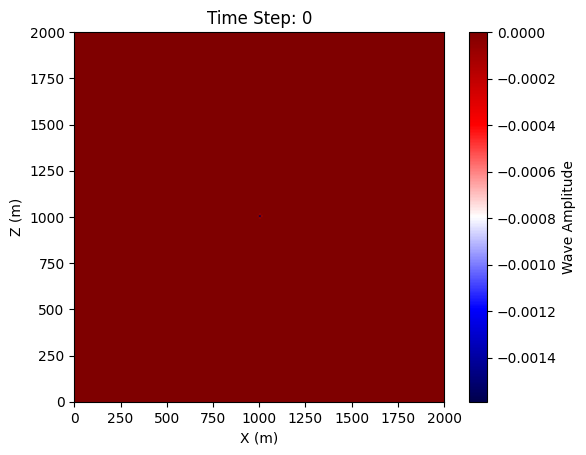

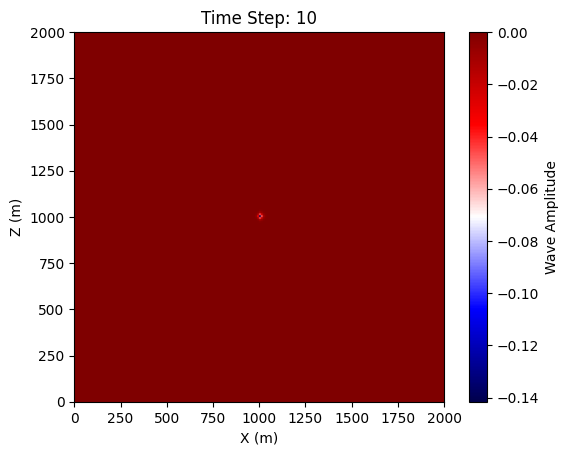

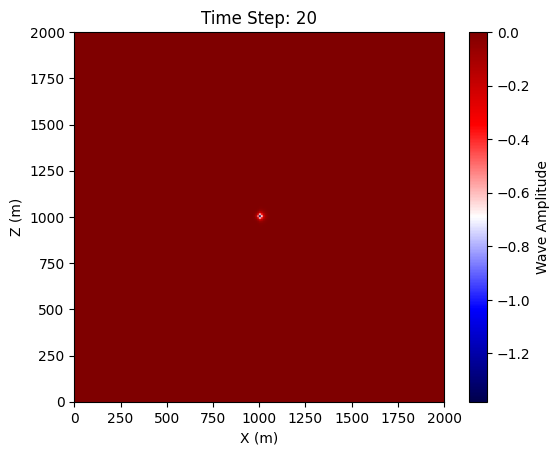

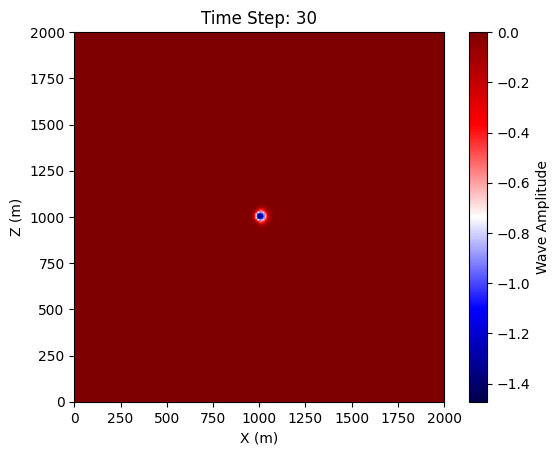

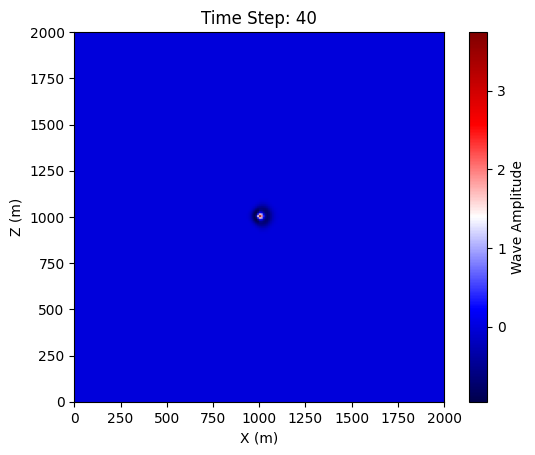

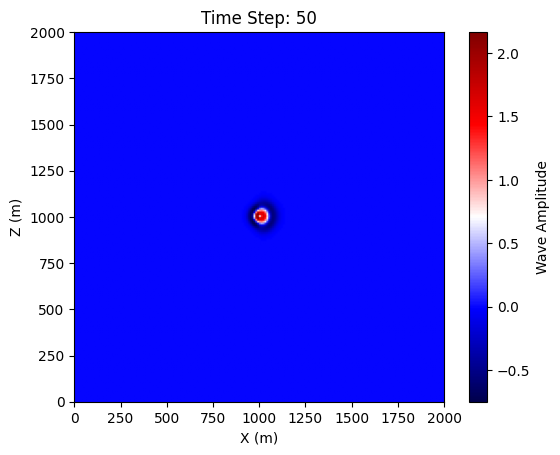

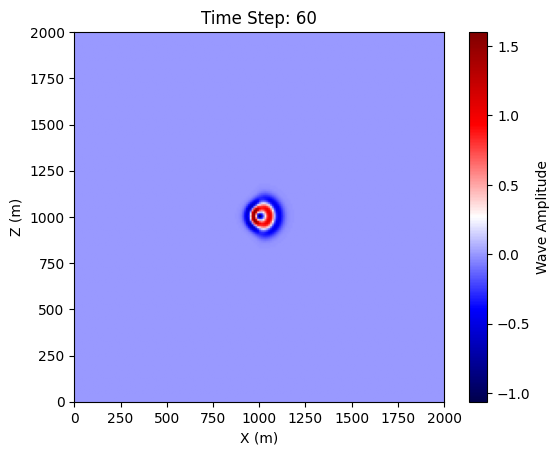

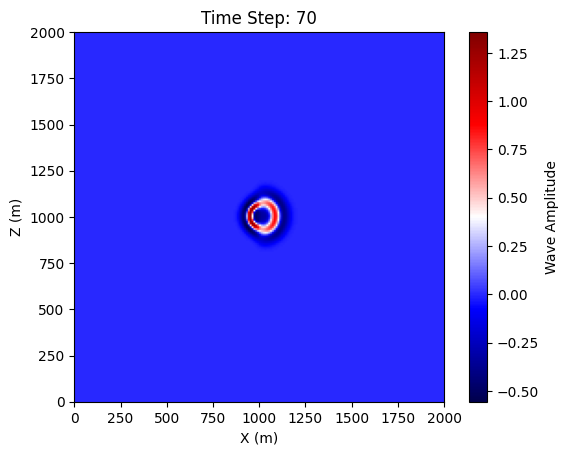

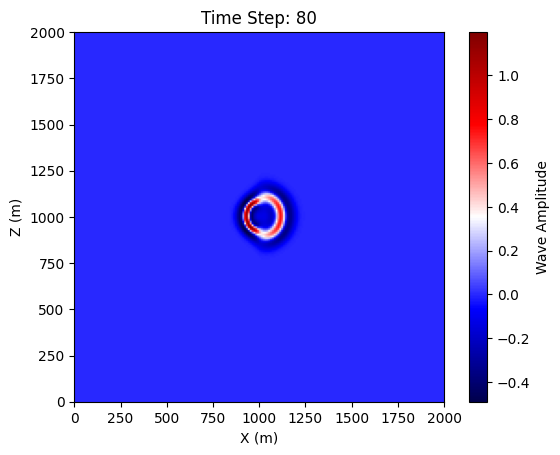

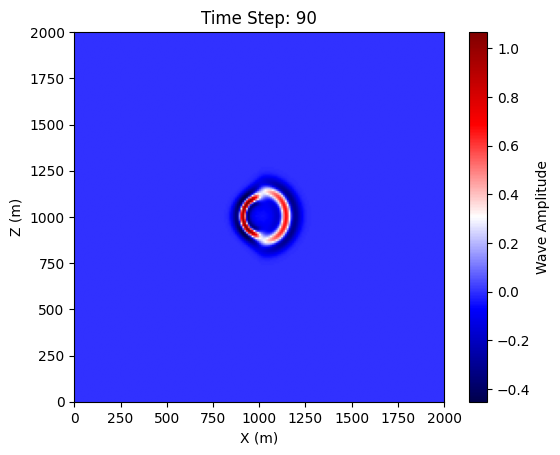

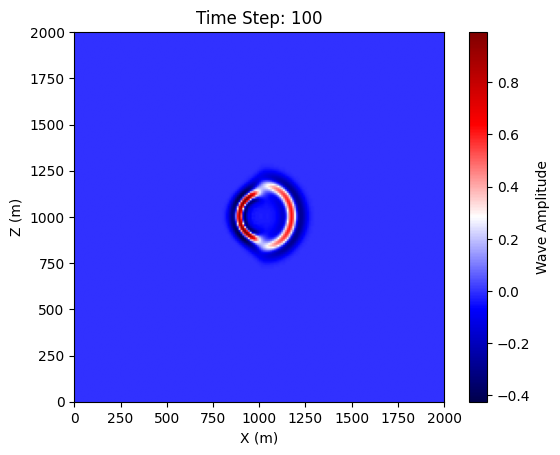

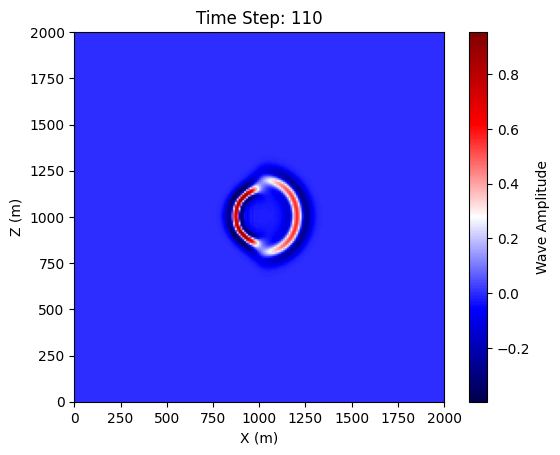

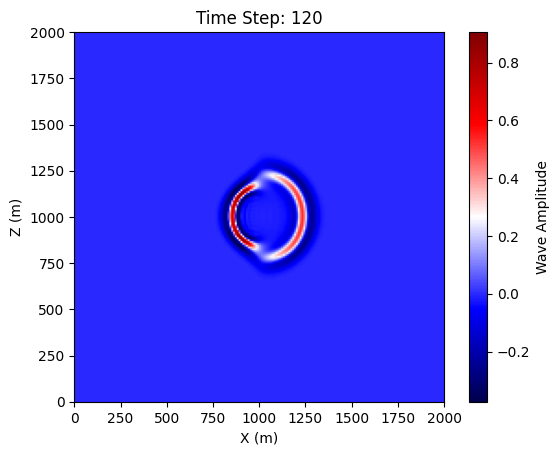

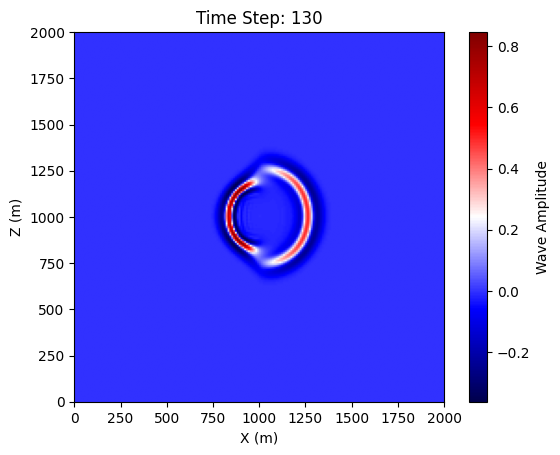

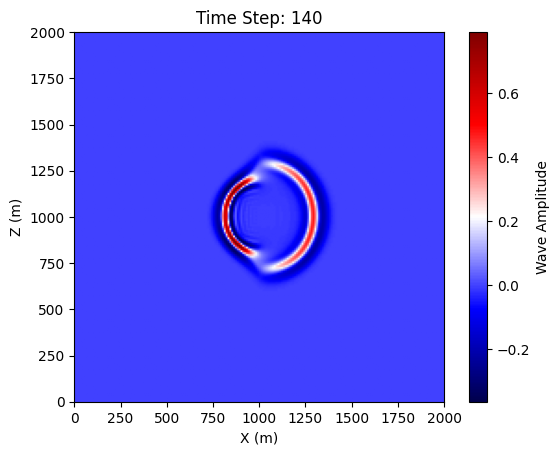

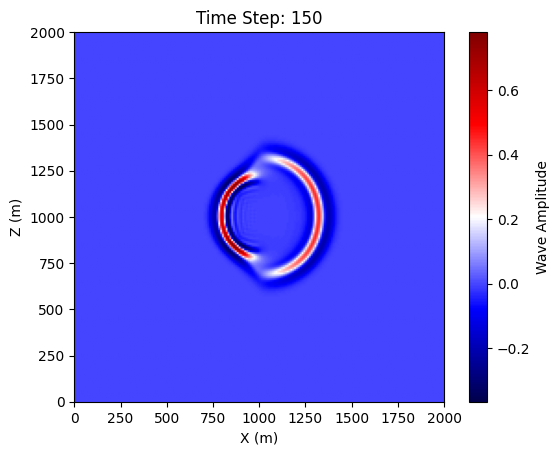

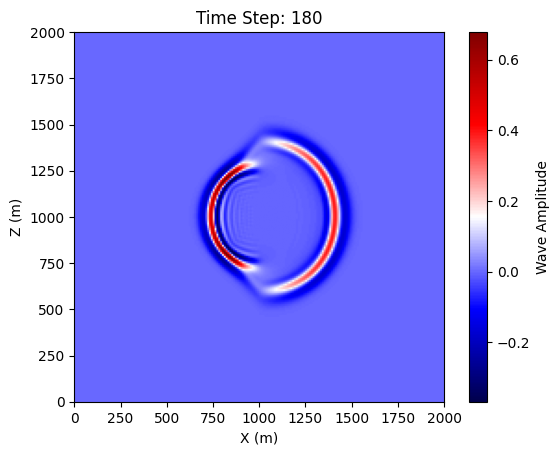

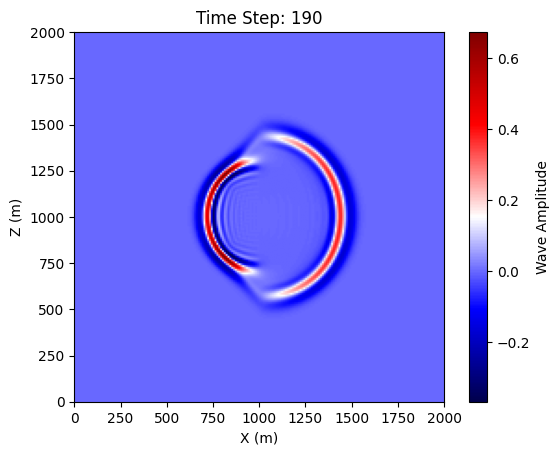

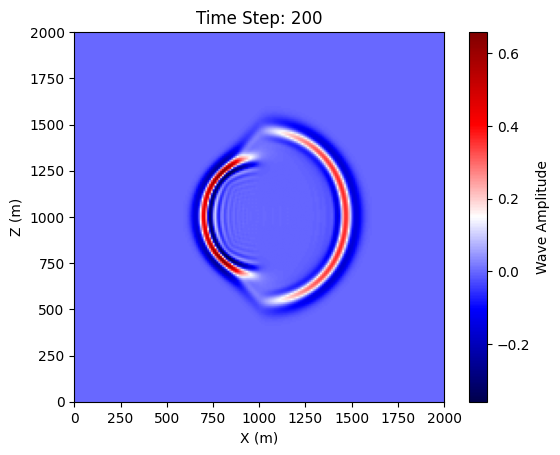

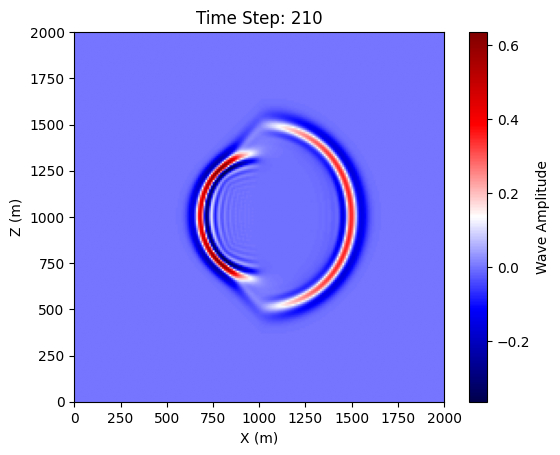

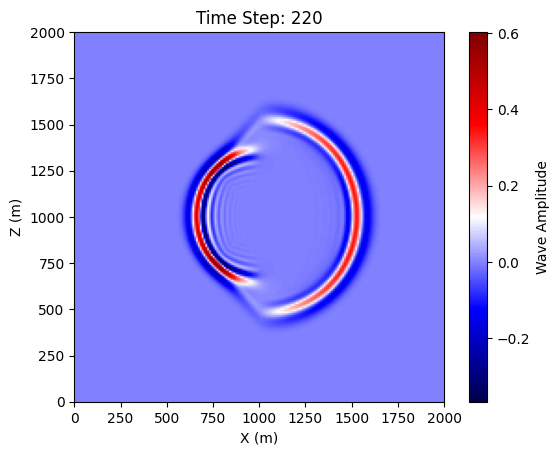

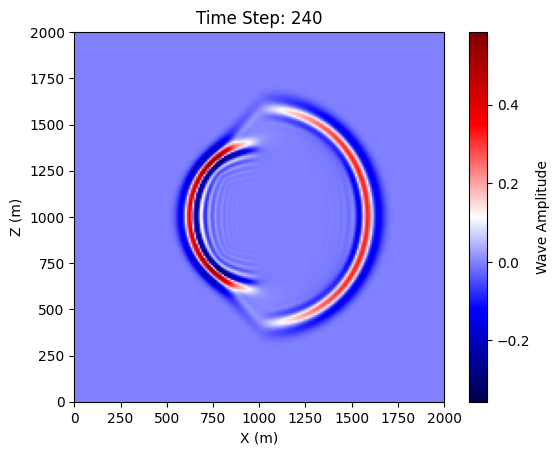

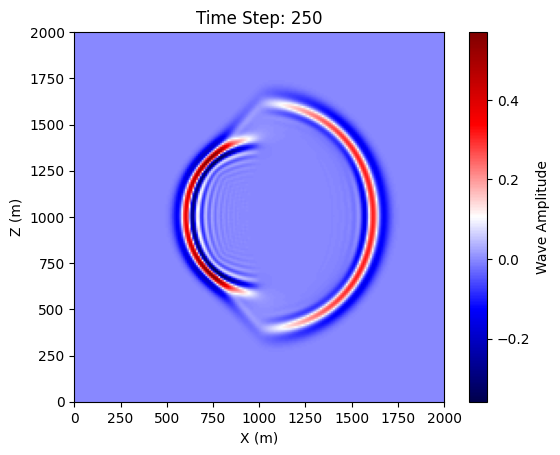

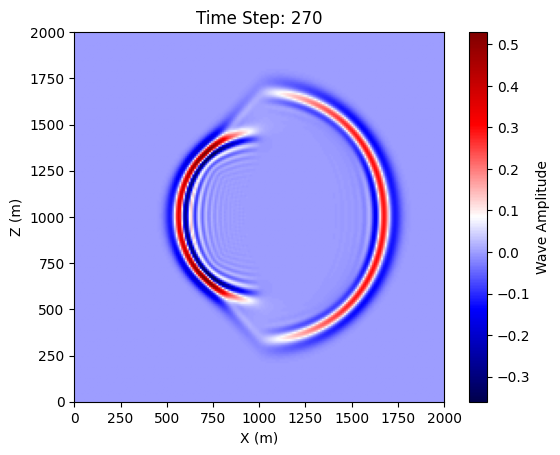

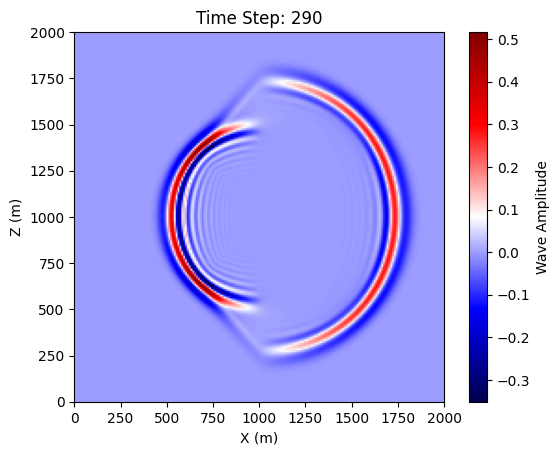

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid and time parameters
nx, nz = 200, 200  # Grid size
dx, dz = 10.0, 10.0  # Grid spacing (meters)
nt = 300  # Number of time steps
dt = 0.001  # Time step (seconds)
c = 2000  # Wave velocity (m/s)

# Initialize wavefield arrays
p = np.zeros((nx, nz))  # Pressure field at time t
p_new = np.zeros((nx, nz))  # Pressure field at time t+1
p_old = np.zeros((nx, nz))  # Pressure field at time t-1

# Define source location
sx, sz = nx // 2, nz // 2  # Center of the grid

# Ricker wavelet source function
def ricker_wavelet(f, t):
    t0 = 1.0 / f
    return (1 - 2 * (np.pi * f * (t - t0)) ** 2) * np.exp(-(np.pi * f * (t - t0)) ** 2)

# Time loop
for t in range(nt):
    # Inject source
    p[sx, sz] += ricker_wavelet(25, t * dt)  # 25 Hz Ricker wavelet

        # Finite difference update (2nd order in time and space)
    c = velocity_model(nx, nz, dx, dz)  # Assign spatially varying velocity

    for i in range(1, nx - 1):
        for j in range(1, nz - 1):
            p_new[i, j] = (2 * p[i, j] - p_old[i, j] +
                          (c[i, j] * dt / dx) ** 2 * (p[i+1, j] + p[i-1, j] + p[i, j+1] + p[i, j-1] - 4 * p[i, j]))

    # Update wavefields
    p_old, p, p_new = p, p_new, p_old

    # Visualization every 10 steps
    if t % 10 == 0:
        plt.imshow(p.T, cmap="seismic", origin="lower", extent=[0, nx*dx, 0, nz*dz])
        plt.colorbar(label="Wave Amplitude")
        plt.title(f"Time Step: {t}")
        plt.xlabel("X (m)")
        plt.ylabel("Z (m)")
        plt.pause(0.01)
        plt.clf()

plt.show()
